In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option("display.max.columns", None)

In [2]:
def na_counts(data_df, array=True):
    """ Count the NaN values in each column of the dataframe, and display results as percentage missing.
    Returns either a dictionary of {column_name: missing_values} or an array of the number of missing values
    in each column.
    
    :param data_df: Dataframe to find missing values in
    :type data_df: :class:`pandas.DataFrame`
    :param array: Boolean value determining whether the results are returned as \
    a dicitonary or an array (default = True)
    :type array: bool
    :return: Array or dictionary of missing values (default is `np.array`)
    :rtype: :class:`np.array` or dict
    """
    
    total_count = data_df.shape[0]
    na_count_dict = {}
    for column in data_df:
        na_mask = data_df[column].isna()
        na_count = data_df[na_mask].shape[0]
        na_count_dict.update({column:na_count})
        print(f"{column}: {round(na_count/total_count*100)}% NaN")
    if array:
        return np.array(list(na_count_dict.values()))
    else:
        return na_count_dict

In [11]:
def find_categoricals(data_df):
    """
    Identify columns containing string values. For this particular use case, all string values are categories
    
    :param data_df: Input dataframe
    :type data_df: :class:`pandas.DataFrame`
    :return: list of columns containing string values
    :rtype: list
    """
    
    string_columns = []
    for column in data_df.columns:
        if data_df[column].dtype=="O":
            string_columns.append(column)
    return string_columns

In [12]:
def show_categories(data_df, categories):
    """
    Displays the unique values of each categorical column
    
    :param data_df: input dataframe
    :type data_df: :class:`pandas.DataFrame`
    :param categories: list of categorical column names
    :type categories: list
    :return: None
    """
    
    for c in data_df[categories]:
        print(data_df[c].value_counts())
        print("\n")
    return

In [4]:
train_id = pd.read_csv("./data/train_identity.csv")

KeyboardInterrupt: 

# Training Set Identities

In [3]:
print(f"train_id shape = {train_id.shape}")
train_id.head()

train_id shape = (144233, 41)


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [74]:
train_id_na = na_counts(train_id)

TransactionID: 0% NaN
id_01: 0% NaN
id_02: 2% NaN
id_03: 54% NaN
id_04: 54% NaN
id_05: 5% NaN
id_06: 5% NaN
id_07: 96% NaN
id_08: 96% NaN
id_09: 48% NaN
id_10: 48% NaN
id_11: 2% NaN
id_12: 0% NaN
id_13: 12% NaN
id_14: 45% NaN
id_15: 2% NaN
id_16: 10% NaN
id_17: 3% NaN
id_18: 69% NaN
id_19: 3% NaN
id_20: 3% NaN
id_21: 96% NaN
id_22: 96% NaN
id_23: 96% NaN
id_24: 97% NaN
id_25: 96% NaN
id_26: 96% NaN
id_27: 96% NaN
id_28: 2% NaN
id_29: 2% NaN
id_30: 46% NaN
id_31: 3% NaN
id_32: 46% NaN
id_33: 49% NaN
id_34: 46% NaN
id_35: 2% NaN
id_36: 2% NaN
id_37: 2% NaN
id_38: 2% NaN
DeviceType: 2% NaN
DeviceInfo: 18% NaN


In [75]:
train_id_na

array([     0,      0,   3361,  77909,  77909,   7368,   7368, 139078,
       139078,  69307,  69307,   3255,      0,  16913,  64189,   3248,
        14893,   4864,  99120,   4915,   4972, 139074, 139064, 139064,
       139486, 139101, 139070, 139064,   3255,   3255,  66668,   3951,
        66647,  70944,  66428,   3248,   3248,   3248,   3248,   3423,
        25567])

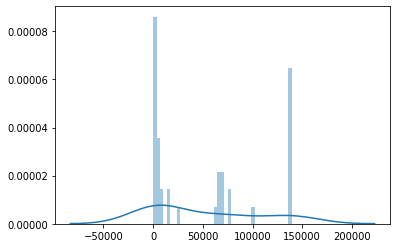

In [83]:
sns.distplot(train_id_na, bins=train_id_na.shape[0]);

In [84]:
print(train_id.shape)
print(train_id.dropna().shape)

(144233, 41)
(935, 41)


In [86]:
train_id.dtypes

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


In [115]:
show_categories(train_id, find_categoricals(train_id))

NotFound    123025
Found        21208
Name: id_12, dtype: int64


Found      67728
New        61612
Unknown    11645
Name: id_15, dtype: int64


Found       66324
NotFound    63016
Name: id_16, dtype: int64


IP_PROXY:TRANSPARENT    3489
IP_PROXY:ANONYMOUS      1071
IP_PROXY:HIDDEN          609
Name: id_23, dtype: int64


Found       5155
NotFound      14
Name: id_27, dtype: int64


Found    76232
New      64746
Name: id_28, dtype: int64


Found       74926
NotFound    66052
Name: id_29, dtype: int64


Windows 10          21155
Windows 7           13110
iOS 11.2.1           3722
iOS 11.1.2           3699
Android 7.0          2871
                    ...  
func                   10
iOS 11.4.0              5
Mac OS X 10_13_5        4
Windows                 3
iOS 11.4.1              1
Name: id_30, Length: 75, dtype: int64


chrome 63.0              22000
mobile safari 11.0       13423
mobile safari generic    11474
ie 11.0 for desktop       9030
safari generic            8195
           

# Training Set Transactions

In [3]:
train_transaction = pd.read_csv("./data/train_transaction.csv")

In [4]:
print(f"train_id shape = {train_transaction.shape}")
train_transaction.head()

train_id shape = (590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [5]:
train_trans_na = na_counts(train_transaction)

TransactionID: 0% NaN
isFraud: 0% NaN
TransactionDT: 0% NaN
TransactionAmt: 0% NaN
ProductCD: 0% NaN
card1: 0% NaN
card2: 2% NaN
card3: 0% NaN
card4: 0% NaN
card5: 1% NaN
card6: 0% NaN
addr1: 11% NaN
addr2: 11% NaN
dist1: 60% NaN
dist2: 94% NaN
P_emaildomain: 16% NaN
R_emaildomain: 77% NaN
C1: 0% NaN
C2: 0% NaN
C3: 0% NaN
C4: 0% NaN
C5: 0% NaN
C6: 0% NaN
C7: 0% NaN
C8: 0% NaN
C9: 0% NaN
C10: 0% NaN
C11: 0% NaN
C12: 0% NaN
C13: 0% NaN
C14: 0% NaN
D1: 0% NaN
D2: 48% NaN
D3: 45% NaN
D4: 29% NaN
D5: 52% NaN
D6: 88% NaN
D7: 93% NaN
D8: 87% NaN
D9: 87% NaN
D10: 13% NaN
D11: 47% NaN
D12: 89% NaN
D13: 90% NaN
D14: 89% NaN
D15: 15% NaN
M1: 46% NaN
M2: 46% NaN
M3: 46% NaN
M4: 48% NaN
M5: 59% NaN
M6: 29% NaN
M7: 59% NaN
M8: 59% NaN
M9: 59% NaN
V1: 47% NaN
V2: 47% NaN
V3: 47% NaN
V4: 47% NaN
V5: 47% NaN
V6: 47% NaN
V7: 47% NaN
V8: 47% NaN
V9: 47% NaN
V10: 47% NaN
V11: 47% NaN
V12: 13% NaN
V13: 13% NaN
V14: 13% NaN
V15: 13% NaN
V16: 13% NaN
V17: 13% NaN
V18: 13% NaN
V19: 13% NaN
V20: 13% NaN
V21: 1

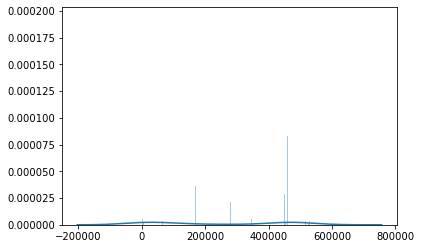

In [6]:
sns.distplot(train_trans_na, bins=train_trans_na.shape[0]);

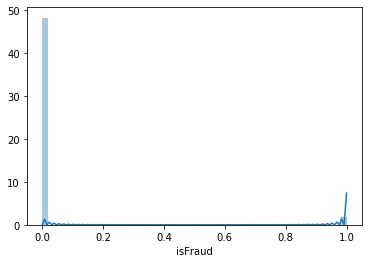

In [7]:
sns.distplot(train_transaction.iloc[:,1]);

In [8]:
train_transaction.iloc[:,1].value_counts() # Roughly 3.5% fraud rate

0    569877
1     20663
Name: isFraud, dtype: int64

In [9]:
20663/(20663+569877)*100

3.4990009144173126

In [13]:
show_categories(train_transaction, find_categoricals(train_transaction))

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64


visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64


debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64


gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net      

In [14]:
def get_email_region(text_entry):
    return text_entry.split(".")[-1]

In [15]:
train_transaction[["P_emaildomain"]].apply(get_email_region)

AttributeError: ("'Series' object has no attribute 'split'", 'occurred at index P_emaildomain')

In [143]:
train_transaction["P_emaildomain"]

0                 NaN
1           gmail.com
2         outlook.com
3           yahoo.com
4           gmail.com
             ...     
590535            NaN
590536      gmail.com
590537      gmail.com
590538        aol.com
590539      gmail.com
Name: P_emaildomain, Length: 590540, dtype: object

In [144]:
train_transaction["P_emaildomain"][0]

nan